In [1]:
# Importamos las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
from glob import glob

In [2]:
def gen_bee(pasos):
    Y = []
    y = [0, 0]
    Y.append(y.copy())

    for i in range(num_pasos):
        d_int = np.random.randint(1, 5)
        if d_int==1:y[1]+=1
        elif d_int==2:y[0]+=1
        elif d_int==3:y[1]-=1
        # elif d_int==4:y[0]-=1
        else:pass
        y2 = y.copy()
        Y.append(y2)
    return Y

def gen_panal(abejas, pasos):
    Z = []

    for abeja in range(abejas):
        z = gen_bee(pasos)
        Z.append(z)
    return Z

In [3]:
# Definimos cuántas abejas habrá y cuántos pasos van a tomar
num_abejas = 100
num_pasos = 10000

w = gen_panal(num_abejas, num_pasos)
W = np.array(w)

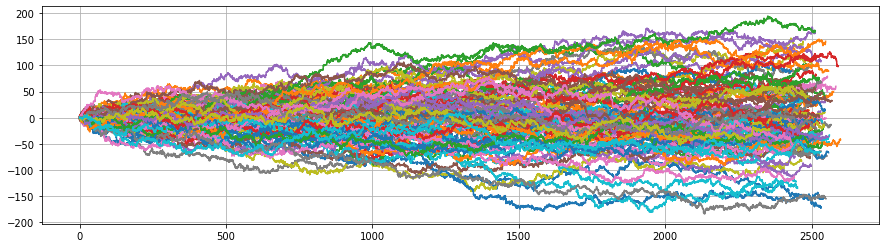

In [4]:
Y2 = np.array(W)

plt.figure(figsize=(15, 4))
for w in W:
    plt.plot(w[:, 0], w[:, 1])
# plt.ylim([-15, 15])
plt.grid()
plt.show()

In [ ]:
# glob("v*2/*")
os.makedirs('imgs', exist_ok=True)

In [ ]:
plt.figure(figsize=(15, 4))

# Loop a través de los pasos en lugar de todas las posiciones de una vez
for paso in range(num_pasos):
    for abeja in range(num_abejas):
        plt.plot(W[abeja, :paso, 0], W[abeja, :paso, 1])
    # Guardar la imagen de este paso
    if paso<10:passo=f"000{paso}"
    elif paso<100:passo=f"00{paso}"
    elif paso<1000:passo=f"0{paso}"
    else:passo=f"{paso}"

    if paso%500==0:
        print(f"Paso: {paso}")

    # plt.grid()
    plt.savefig(f"imgs/movimiento_abejas_paso_{passo}.png")
    # Limpiar el gráfico para el próximo paso
    plt.clf()

In [ ]:
# imgs = glob("/content/carpeta6/*png")
imgs = glob("imgs/*png")
imgs.sort()
print(len(imgs))
imgs[-5:]

In [ ]:
# list of image paths
img_array = []
cont = 0
for filename in imgs[:]:  # replace with your list
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

In [ ]:
len(img_array)

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('bees.mp4', fourcc, 5.0, size)

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

In [ ]:
os.path.getsize('bees.mp4')/1.024e6